In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


Observations: 1697
Variables: 2
Cat_cols: 0
Num_cols: 2
Cat_but_car: 0
None
count    1696.000000
mean        1.159933
std        79.005970
min      -134.962839
1%       -133.130296
5%       -124.366669
10%      -116.819920
20%       -92.852449
30%       -46.320562
40%       -14.823095
50%        10.195194
60%        32.633331
70%        56.611937
80%        80.633331
90%       104.361054
95%       114.574354
99%       128.076325
max       134.605775
Name: input, dtype: float64


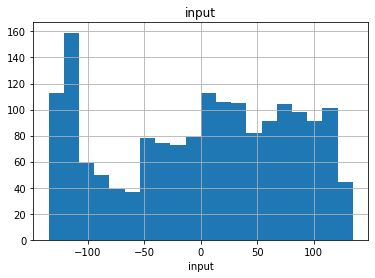

count    1696.000000
mean      -34.088017
std        65.771112
min      -132.422167
1%       -127.063611
5%       -111.000000
10%       -99.386909
20%       -86.776182
30%       -75.181534
40%       -63.000000
50%       -50.470981
60%       -40.445271
70%       -25.876783
80%        16.391781
90%        84.642175
95%       112.652706
99%       131.000000
max       134.425495
Name: output, dtype: float64


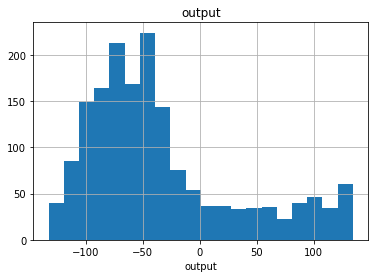

None


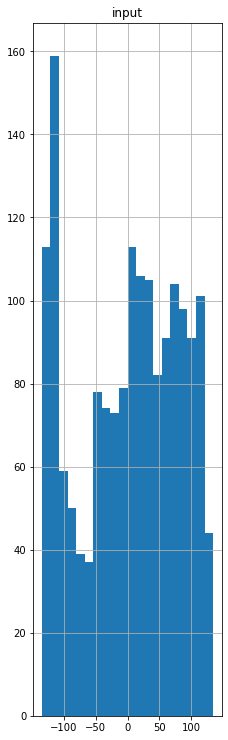

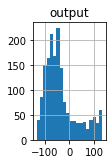

None


In [3]:
# ***Numerical and Categorical Features***

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Catgeorical Variable Selection
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerical Variable Selection
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

# Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(df)
    for col in cat_cols:
        cat_summary(dataframe, col, plot=True)

print(cat_summary_df(df))

def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

print(num_summary_df(df))

def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  plt.figure(figsize=(12, 20))
  for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)
    plt.show()

print(plot_num_summary(df))


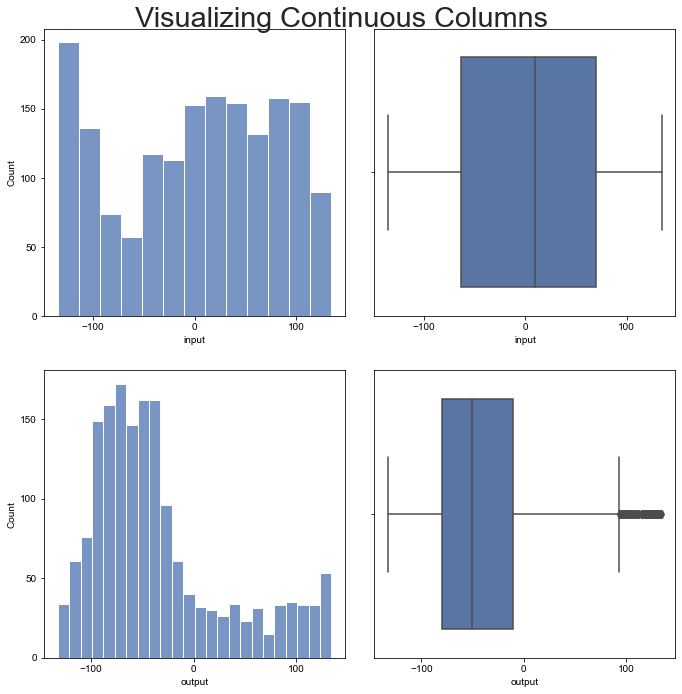

None


In [4]:
# ***EDA- Histplot and Boxplot***

import scipy.stats as stats
def exploratory_data(dataframe):
    import warnings
    warnings.filterwarnings('ignore')
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.set(font_scale=2)
    for index, col in enumerate(num_cols):
        sns.histplot(dataframe[col], ax=ax[index, 0])
        sns.boxplot(dataframe[col], ax=ax[index, 1])
        # stats.probplot(dataframe[col], plot=ax[index, 2])
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.suptitle("Visualizing Continuous Columns")
    plt.show()

print(exploratory_data(df))

In [5]:
# ***Visualizing Missing Data***
df.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
df['input'] = df['input'].fillna(df['input'].mode()[0])
df['output'] = df['output'].fillna(df['output'].mode()[0])

In [7]:
df.isnull().sum()

input     0
output    0
dtype: int64

<AxesSubplot:xlabel='input'>

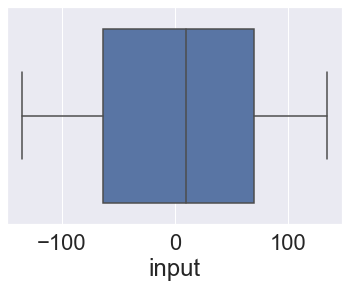

In [8]:
import seaborn as sns
sns.boxplot(df['input'])

<AxesSubplot:xlabel='output'>

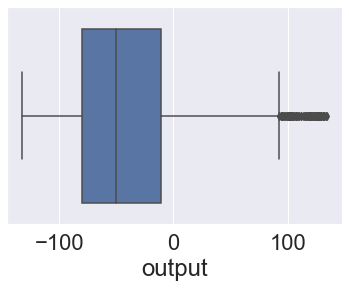

In [9]:
import seaborn as sns
sns.boxplot(df['output'])

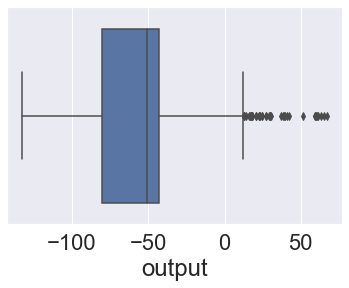

In [10]:
for i in df['output']:
  q1=df['output'].quantile(0.25)
  q3=df['output'].quantile(0.75)
  iqr=q3-q1
  Lower_tail=q1-1.5*iqr
  Upper_tail=q3+1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    df['output']=df['output'].replace(i,np.median(df['output']))
sns.boxplot(df['output'])
plt.show()

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * interquartile_range
    up_limit = quartile3 + 1.5 * interquartile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in df.columns:
    print(col, check_outlier(df, col))

input False
output True


In [ ]:
from sklearn.linear_model import LinearRegression
X = df.iloc[:, 0].values.reshape(-1, 1)  
Y = df.iloc[:, 1].values.reshape(-1, 1)  
model = LinearRegression()  
model.fit(X, Y)  
Y_pred = model.predict(X)  

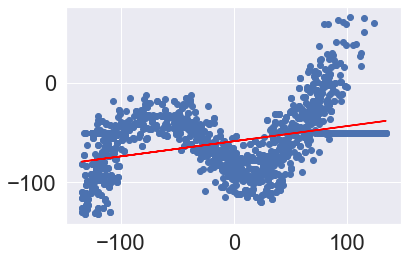

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [14]:
import statsmodels.api as sm
X_addC = sm.add_constant(X)
result = sm.OLS(Y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.14193056278264238 0.1414243271264669


In [20]:
X = df.drop(['output'],axis=1)
y = df['output']
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_transformed,
    test_size=0.3,
    random_state=0)

[  2   4   3 ... 157  64  78]


[  2   4   3 ... 157  64  78]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

pred_prob1 = classifier.predict_proba(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.33      1.00      0.50         1
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.33      1.00      0.50         1
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         0
          20       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         1
          25 

From the obersavtion it can be said that random forest is good model for this dataset.
As it has good accuracy and the model evaluation is a